# Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

Using TensorFlow backend.


# Load data

In [2]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 46s 0us/step


# Normalization and pre-processing
    The data is loaded as integers, so we must cast it to floating values in order to perfom the division then convert to one hot encoding.
    1. use astype('TYPE')
    2. use np_utils.to_categorical(data , num_classes)

X_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


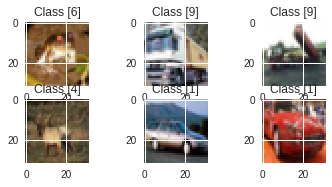

In [3]:
### TO DO ###
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [4]:
# use astype('TYPE')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training shape", X_train.shape)
print("Testing shape", X_test.shape)

# use np_utils.to_categorical(data, num_classes)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Training shape (50000, 32, 32, 3)
Testing shape (10000, 32, 32, 3)


# Build CNN Model

We need to specify the shape of the input which is (32, 32, 3).

The first layer and second layer is the Conv2d layer. We need 32 filters and kernel size = 3 and used ReLU (rectified linear unit) as our activation function. 

The third layer is the MaxPooling layer that has pool size (2,2)

The fourth layer is Dropout layer will randomly disable 20% of the neurons.

The fifth and sixth layer are same first and second layer but increase filters from 32 to 64.

The seventh are same thrid layer.

The eighth is Dropout layer will randomly 25% of the neurons.

After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Dense layers.

Dense layers have 512 neurons and activation function is 'relu'.

Dropout will randomnly disable 50% of the neurons.

The last layer is the Dense layer with 10 neurons and activation function is Softmax . 

Our model have architecture belowing:

![](https://pbs.twimg.com/media/DJDu-seXcAAvqZf.jpg:large)

*(Source: https://twitter.com/DeepLearn007/status/905486345862344704)*

Function :
    1. Input(shape = (input_shape))
    2. Conv2D(filters, kernel_size, activation = 'activation')(previous_layer)
    3. MaxPooling2D(pool_size)(previous_layer)
    4. Dropout(rate)(previous_layer)
    5. Flatten()(previous_layer)
    6. Dense(units , activation = 'activation')(previous_layer)
    7. Model(inputs , outputs)

If you create model success your model must have model.summary() like below :



```
# This is formatted as code
```


<!-- cnn_sol.png -->
![](https://i.imgur.com/Y4jveXj.png)

In [5]:
### TO DO ###
input_tensor = Input(shape = (32,32,3))
conv1 = Conv2D(32, kernel_size=3, activation='relu')(input_tensor)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
dropout1 = Dropout(0.2)(pool1)

conv2 = Conv2D(64, kernel_size=3, activation='relu')(dropout1)
conv3 = Conv2D(64, kernel_size=3, activation='relu')(conv2)
pool2 = MaxPooling2D(pool_size=(2,2))(conv3)
dropout2 = Dropout(0.25)(pool2)
flatten1 = Flatten()(dropout2)

hidden1 = Dense(512, activation='relu')(flatten1)
dropout2 = Dropout(0.5)(hidden1)
pred = Dense(10, activation='softmax')(dropout2)

model = Model(inputs=input_tensor, outputs=pred)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=0, verbose=1)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)    

# Compile
we use loss function categorical crossentropy and optimizer adam to compile our model.
    
function = compile(loss='loss_function', optimizer='optimizer_functin',metrics=['accuracy'])

In [0]:
### TO DO

# Fit data
If you create function fit data already. 

In [7]:
### TO DO
history = model.fit(X_train, Y_train, batch_size=32, epochs=20,
                    verbose=1, validation_split=0.2,
                    callbacks = [early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 22s 545us/step - loss: 1.5996 - acc: 0.4126 - val_loss: 1.2798 - val_acc: 0.5437
Epoch 2/20
40000/40000 [==============================] - 17s 418us/step - loss: 1.2771 - acc: 0.5432 - val_loss: 1.1720 - val_acc: 0.5842
Epoch 3/20
40000/40000 [==============================] - 17s 415us/step - loss: 1.1309 - acc: 0.5978 - val_loss: 1.0031 - val_acc: 0.6521
Epoch 4/20
40000/40000 [==============================] - 17s 414us/step - loss: 1.0375 - acc: 0.6361 - val_loss: 0.9521 - val_acc: 0.6698
Epoch 5/20
40000/40000 [==============================] - 17s 421us/step - loss: 0.9767 - acc: 0.6558 - val_loss: 0.9112 - val_acc: 0.6831
Epoch 6/20
40000/40000 [==============================] - 16s 411us/step - loss: 0.9142 - acc: 0.6780 - val_loss: 0.8986 - val_acc: 0.6899
Epoch 7/20
40000/40000 [==============================] - 17s 422us/

# Evaluate
function = evaluate(Test_data, verbose=0)

In [8]:
### TO DO
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.8640985565185547
Test accuracy: 0.7061


# Plot show acc and loss

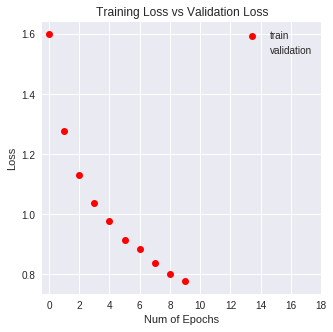

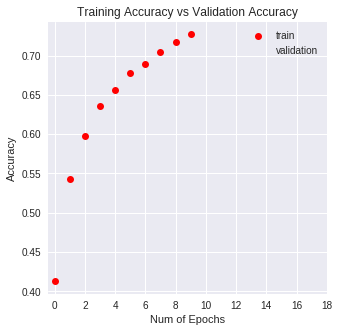

In [9]:
plt.rcParams['figure.figsize'] = (5,5)  
plt.figure(0)
plt.plot(history.history['loss'],'ro')
plt.plot(history.history['val_loss'],'b+')
plt.xticks(np.arange(0, 20, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.rcParams['figure.figsize'] = (5,5) 
plt.figure(1)
plt.plot(history.history['acc'],'ro')
plt.plot(history.history['val_acc'],'b+')
plt.xticks(np.arange(0, 20, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.show()

# Confusion matrix

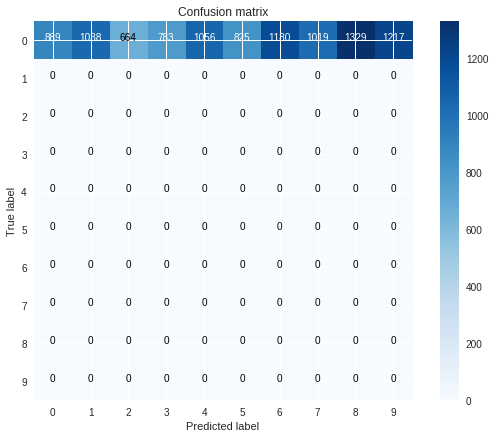

In [10]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# Inspecting output

<Figure size 504x504 with 0 Axes>

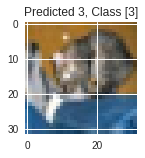

<Figure size 504x504 with 0 Axes>

In [11]:
predicted = model.predict(X_test)
predicted_classes = np.argmax(predicted,axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
plt.rcParams['figure.figsize'] = (7,7) 
plt.figure()
for i, correct in enumerate(correct_indices[:1]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct], cmap='viridis', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()

# Data augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

# Inspecting data

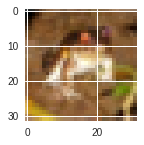

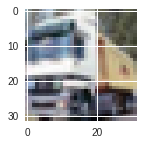

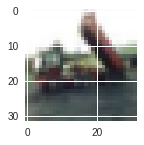

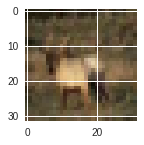

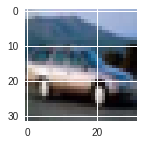

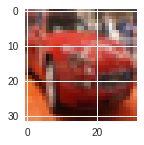

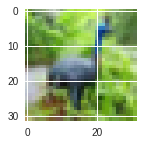

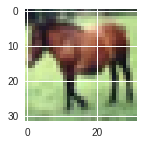

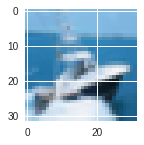

In [13]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()

In [0]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=False,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

## Fit data to datagen

function -> datagen.fit(data)

## Fit data to the same model

function -> model.fit_generator(datagen.flow(train_data , batch_size = batch_size), epochs =nb_classes,
            verbose=1,validation_data=(test_data))

In [26]:
### To Do
datagen.fit(X_train)
model.fit_generator(
datagen.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=10,
    epochs=20,
    validation_data=(X_test, Y_test),
    workers=4
)

Epoch 1/20
10/10 [==============================] - 2s 170ms/step - loss: 1.1148 - acc: 0.6406 - val_loss: 0.8300 - val_acc: 0.7132
Epoch 2/20
10/10 [==============================] - 1s 149ms/step - loss: 1.0951 - acc: 0.6125 - val_loss: 0.8659 - val_acc: 0.7009
Epoch 3/20
10/10 [==============================] - 1s 145ms/step - loss: 1.0432 - acc: 0.6656 - val_loss: 0.8863 - val_acc: 0.7011
Epoch 4/20
10/10 [==============================] - 1s 145ms/step - loss: 1.0464 - acc: 0.6500 - val_loss: 0.8752 - val_acc: 0.6954
Epoch 5/20
10/10 [==============================] - 2s 151ms/step - loss: 0.9208 - acc: 0.6562 - val_loss: 0.9502 - val_acc: 0.6752
Epoch 6/20
10/10 [==============================] - 1s 143ms/step - loss: 1.0854 - acc: 0.6281 - val_loss: 0.8403 - val_acc: 0.7163
Epoch 7/20
10/10 [==============================] - 2s 151ms/step - loss: 1.0134 - acc: 0.6375 - val_loss: 0.8998 - val_acc: 0.6956
Epoch 8/20
10/10 [==============================] - 1s 137ms/step - loss: 1.

# Inspecting data augmentation

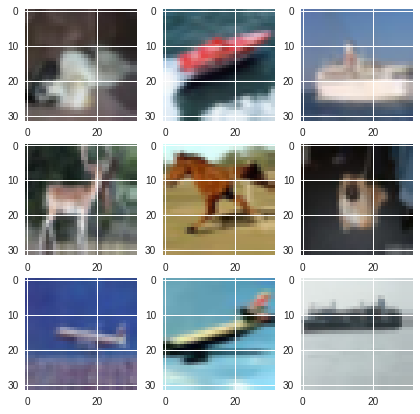

In [27]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=128):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i], cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

# Evaluate

In [28]:
### To Do 
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.90120637550354
Test accuracy: 0.6823
